<a href="https://colab.research.google.com/github/srijac9/Machine-Learning-and-Data-Visualization-Course/blob/main/2023_10_05_SrijaChitturi_Project59.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Instructions

#### Goal of the Project

This project is designed for you to practice and solve the activities that are based on the concepts covered in the following lessons:

1. Simple Linear Regression I
2. Simple Linear Regression II



---

#### Getting Started:

1. Follow the next 3 steps to create a copy of this colab file and start working on the project.

2. Create a duplicate copy of the Colab file as described below.

  - Click on the **File menu**. A new drop-down list will appear.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/lesson-0/0_file_menu.png' width=500>

  - Click on the **Save a copy in Drive** option. A duplicate copy will get created. It will open up in the new tab on your web browser.

  <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/lesson-0/1_create_colab_duplicate_copy.png' width=500>

3. After creating the duplicate copy of the notebook, please rename it in the **YYYY-MM-DD_StudentName_Project59** format.

4. Now, write your code in the prescribed code cells.


---

### Problem Statement

As an owner of a startup, you wish to forecast the sales of your product to plan how much money should be spent on advertisements. This is because the sale of a product is usually proportional to the money spent on advertisements.

Predict the impact of TV advertising on your product sales by performing simple linear regression analysis.





---

### List of Activities

**Activity 1:** Analysing the dataset

  
**Activity 2:**  Train-Test split

**Activity 3:**  Model training

**Activity 4:** Plotting the best fit line

**Activity 5:** Model prediction





---


#### Activity 1:  Analysing the Dataset

Create a Pandas DataFrame for **Advertising-Sales** dataset using the below link. This dataset contains information about the money spent on the TV, radio and newspaper advertisement (in thousand dollars) and their generated sales (in thousand units). The dataset consists of examples that are divided by 1000.

  **Source:** https://www.kaggle.com/ishaanv/ISLR-Auto

  **Dataset Link:** https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/advertising.csv

Also, print the first five rows of the dataset. Check for null values and treat them accordingly.




In [ ]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/advertising.csv')

# Print first five rows using head() function
df.head()


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
# Check if there are any null values. If any column has null values, treat them accordingly
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

---

#### Activity 2: Train-Test Split

For simple linear regression, consider only the effect of **TV ads** on sales. Thus, `TV` is the feature variable and `Sales` is the target variable.

Split the dataset into training set and test set such that the training set contains 67% of the instances and the remaining instances will become the test set.




In [ ]:
# Split the DataFrame into the training and test sets.
x = df['TV']
y = df['Sales']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.67, random_state=42)

---

#### Activity 3: Model Training

Train the simple regression model using the **training data** to obtain the best fit line $y = mx + c$. For this, perform the following tasks:

1. Create following two functions:

 - A function `errors_product()` that calculates the errors for the feature and target variables i.e. $(x_i - \bar{x})(y_i - \bar{y})$

 - A function `squared_errors()` that calculates the squared errors for the feature variable only i.e. $(x_i - \bar{x})^2$

2. Calculate the **slope** and **intercept** values for the best fit line by applying the following formulae:
 $$slope\Rightarrow m = \frac{\sum(x_i - \bar{x})(y_i - \bar{y})}{\sum (x_i - \bar{x})^2}=\frac{ errors\_product().sum()}{squared\_errors().sum()}$$

 $$intercept \Rightarrow c = \bar{y} - m \bar{x}$$



In [ ]:
# Create the 'errors_product()' and 'squared_errors()' function.
def errors_product():
  product_errors = (x_train - x_train.mean()) * (y_train - y_train.mean())
  return product_errors

def squared_errors():
  squared_errors = (x_train - x_train.mean()) ** 2
  return squared_errors

In [ ]:
# Calculate the slope and intercept values for the best fit line.
slope = (errors_product()).sum() / (squared_errors()).sum()
intercept = y_train.mean() - (slope * x_train.mean())

print(f'Slope = {slope}')
print(f'Intercept = {intercept}')

Slope = 0.0558199736780608
Intercept = 7.0204372159602535


**Q:** What is the equation obtained for the best fit line of this model?

**A:** y = 0.0.0558199736780608 * x + 7.0204372159602535

---

#### Activity 4: Plotting the Best Fit Line

After obtaining the slope and intercept values for the best fit line, plot this line along with the scatter plot to see how well it fits the points.


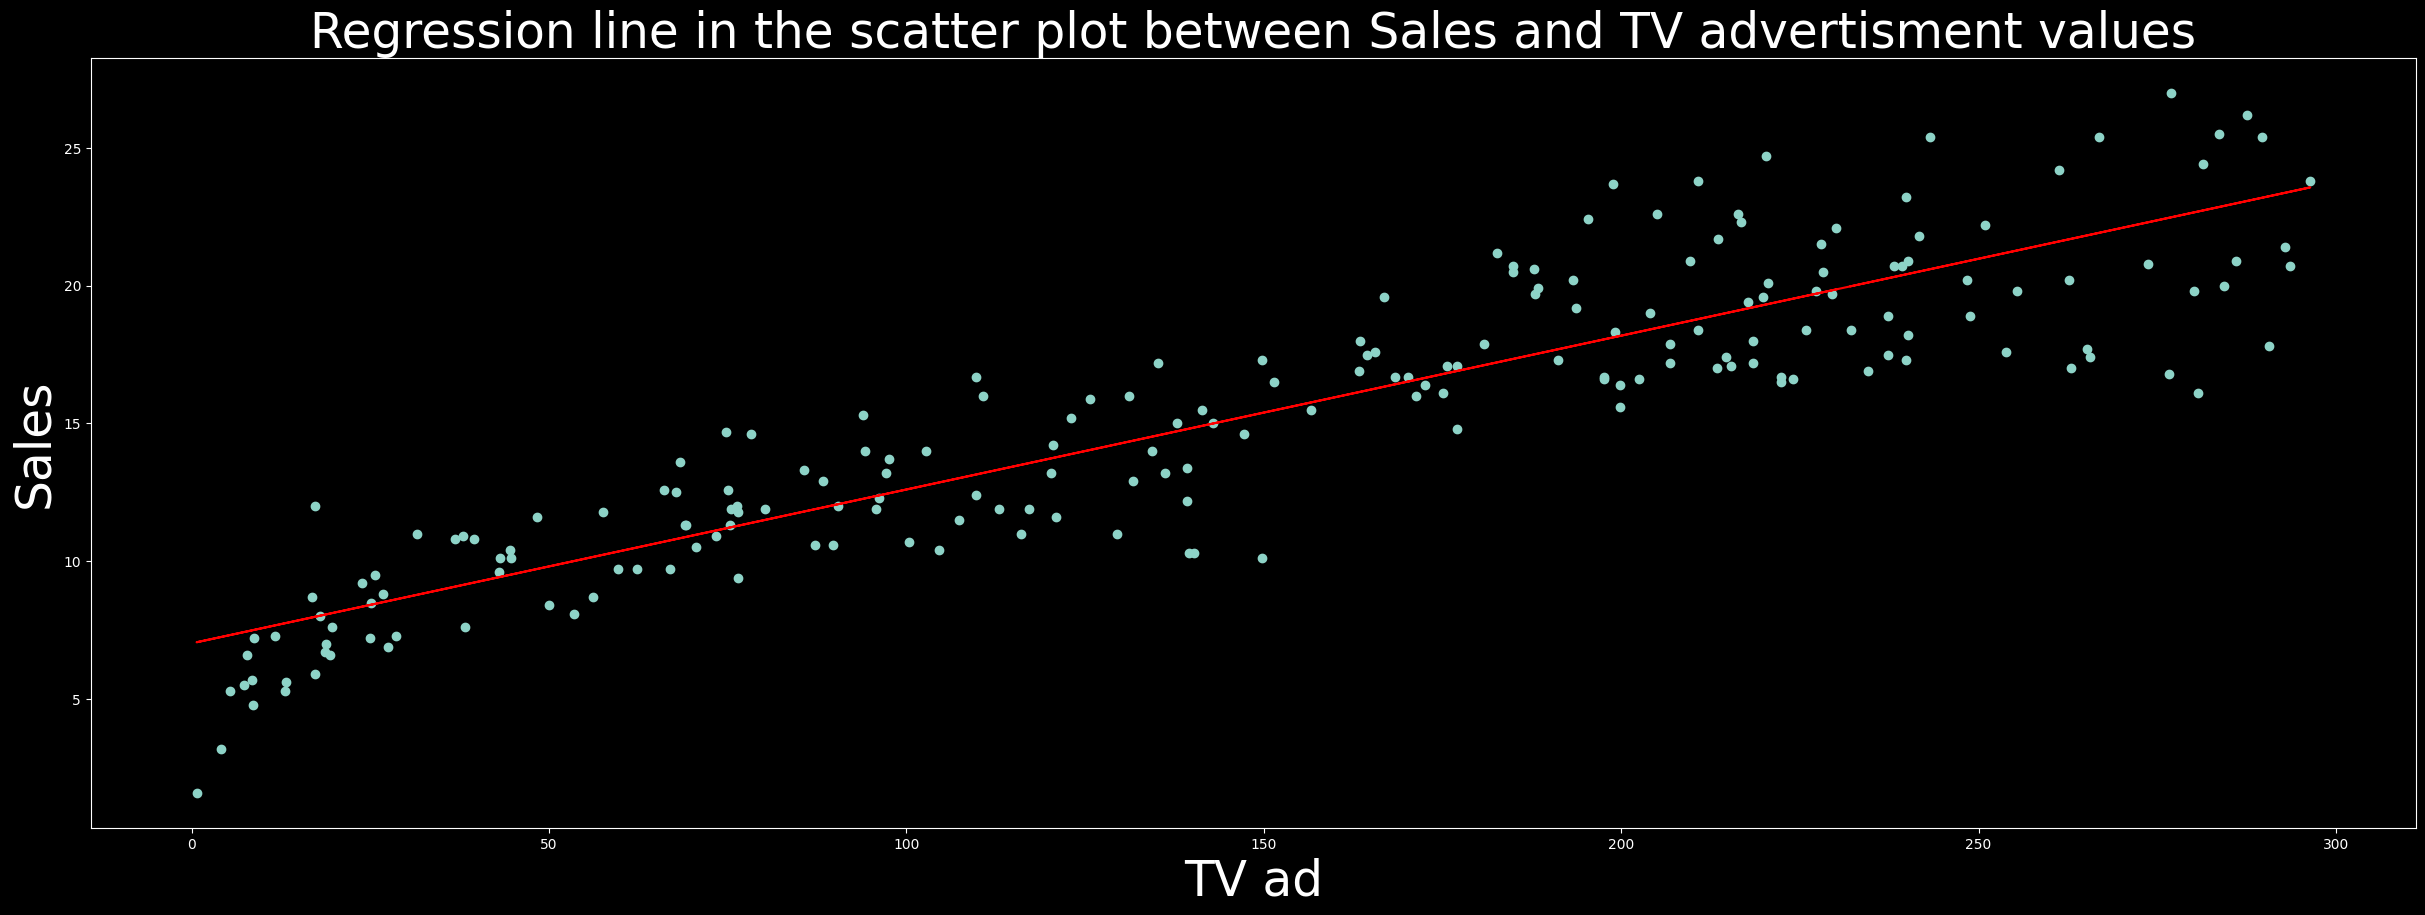

In [ ]:
#  Plot the regression line in the scatter plot between Sales and TV advertisment values.
sales = slope * df['TV'] + intercept

plt.figure(figsize=(30, 10))
plt.title("Regression line in the scatter plot between Sales and TV advertisment values",fontsize=35)
plt.plot(x, sales, color = 'r')
plt.scatter(x, y)
plt.xlabel('TV ad',fontsize = 35)
plt.ylabel('Sales',fontsize = 35)
plt.show()

---

#### Activity 5: Model Prediction

For the TV advertising of $50,000, what is prediction for Sales? In order to predict this value, perform the following task:

- Based on the regression line, create a function `sales_predicted()` which takes a budget to be used for TV advertising as an input and returns the corresponding units of Sales.
- Call the function `sales_predicted()` and pass the amount spent on TV advertising.

**Note:** To predict the sales for TV advertising of $50,000, pass 50 as parameter to `sales_predicted()` function as the original data of this dataset consists of examples that are divided by 1000. Also, the value obtained after calling `sales_predicted(50)` must be multiplied by 1000 to obtain the predicted units of sales.



In [ ]:
#Create a function which takes TV advertisement value as an input and returns the sales.
def sales_predicted(tv):
  prediction = (slope * tv) + intercept
  return prediction
# Calculating sales value against $50,000 spent in TV ads
pred_sales = sales_predicted(50)
print(f'The predicted sales value for $50,000 spent in TV ads is {pred_sales * 1000:.2f}$')


The predicted sales value for $50,000 spent in TV ads is 9811.44$


**Q:** If you are planning to invest $50,000 dollars in TV advertising, how many unit of sales can be predicted according to this simple linear regression model?

**A:** 9811.44$

---

### Submitting the Project:

1. After finishing the project, click on the **Share** button on the top right corner of the notebook. A new dialog box will appear.

  <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/2_share_button.png' width=500>

2. In the dialog box, make sure that '**Anyone on the Internet with this link can view**' option is selected and then click on the **Copy link** button.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/3_copy_link.png' width=500>

3. The link of the duplicate copy (named as **YYYY-MM-DD_StudentName_Project59**) of the notebook will get copied

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/4_copy_link_confirmation.png' width=500>

4. Go to your dashboard and click on the **My Projects** option.
   
   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/5_student_dashboard.png' width=800>

  <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/6_my_projects.png' width=800>

5. Click on the **View Project** button for the project you want to submit.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/7_view_project.png' width=800>

6. Click on the **Submit Project Here** button.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/8_submit_project.png' width=800>

7. Paste the link to the project file named as **YYYY-MM-DD_StudentName_Project59** in the URL box and then click on the **Submit** button.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/9_enter_project_url.png' width=800>

---